In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import librosa

#Creating Dataset

In [2]:
def get_filename(dir_name):
  filenames_list=[]
  for entry in os.scandir(dir_name):
     if (entry.path.endswith(".wav") and entry.is_file()):
      filenames_list.append(entry.name)
  return filenames_list

In [3]:
def get_subfolders(dir_name):
  dirlist=[]
  for item in os.listdir(dir_name):
    if os.path.isdir(item):
        dirlist.append(item)
  return dirlist

##Creating X_train

In [ ]:
dir_name='/content/drive/MyDrive/Colab Notebooks/Audio/X_train'
os.chdir(dir_name)
folder_list=get_subfolders(dir_name)
X_train=[]
avance=1
for folder in folder_list:
  print("Treating folder",avance,"out of",np.size(folder_list))
  avance=avance+1
  filename_list=get_filename(dir_name+'/'+folder)
  os.chdir(dir_name+'/'+folder)
  for file in filename_list:
    S,sr=librosa.load(dir_name+'/'+folder+'/'+file)
    sf=librosa.feature.mfcc(S,n_mfcc=40)
    #X = np.expand_dims(X, axis=1)
    X_train.append(sf)
  X=np.array(X_train)

##Creating y_train

In [ ]:
dir_name='/content/drive/MyDrive/Colab Notebooks/Audio/y_train'
os.chdir(dir_name)
folder_list=get_subfolders(dir_name)
y_train=[]
avance=1
for folder in folder_list:
  print("Treating folder",avance,"out of",np.size(folder_list))
  avance=avance+1
  filename_list=get_filename(dir_name+'/'+folder)
  os.chdir(dir_name+'/'+folder)
  for file in filename_list:
    S,sr=librosa.load(dir_name+'/'+folder+'/'+file)
    sf=librosa.feature.mfcc(S,n_mfcc=40)
    #y = np.expand_dims(y, axis=1)
    y_train.append(sf)
  y=np.array(y_train)

In [ ]:
input_shape = X.shape[1:]

print("Input shape: {}".format(input_shape))

In [18]:
X=tf.convert_to_tensor(X,dtype=tf.float32)
y=tf.convert_to_tensor(y,dtype=tf.float32)

#CNN

## Configuration of our CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
        
        tf.keras.layers.Conv1D(9, 3,padding="same",activation='relu',input_shape=input_shape),
        #tf.keras.layers.MaxPooling1D(pool_size=2, padding='valid'),
        
        
])

In [ ]:
model.compile(
    optimizer = 'Adam',
    loss = 'mae',
)
model.summary()

## Training of our model

In [ ]:
history = model.fit(
    X, y,
    batch_size=1160,
    epochs=500,
)
# Start the plot at epoch 10
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss']].plot()

##Results

After training our model, we decided to make a prediction using the same dataset used to train it. This is obviously not a good idea, but it is a quick and dirty way to see if our model has learned anything.
Our previous models were not even capable of doing that. 
Of course, we will make predictions on a specific dataset to validate our  findings.

In [ ]:
y_predict=model.predict(X)

### Visualizing our predictions

[Text(0.5, 1.0, 'MFCC')]

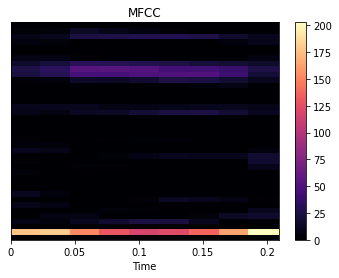

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_predict[180], x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')


[Text(0.5, 1.0, 'MFCC')]

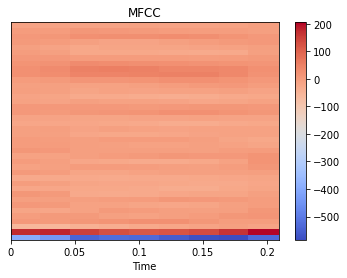

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y_train[180], x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')


### Listening to the predicitions :


In [ ]:
ipd.Audio(librosa.feature.inverse.mfcc_to_audio(y_train[181], n_mels=128, dct_type=2, norm='ortho', ref=1.0, lifter=0),rate=44100)

In [ ]:
ipd.Audio(librosa.feature.inverse.mfcc_to_audio(y_predict[181], n_mels=128, dct_type=2, norm='ortho', ref=1.0, lifter=0),rate=44100)

In [ ]:
#Mise en place d'un early stopping : 

# Certainement à utiliser plus tard...
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(
#    min_delta=0.001, # minimium amount of change to count as an improvement
#    patience=20, # how many epochs to wait before stopping
#    restore_best_weights=True,
#)